In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import sys
sys.path.append('../.venv/lib/python3.7/site-packages/')
sys.path.append('..')

In [2]:
from src.components.speech.trial import Trial
import matplotlib.pyplot as plt

In [3]:
def analyze_utterances(utterances_per_subject):
    num_utterances = 0
    num_utterances_missing_vocalics = 0

    earliest_vocalic_timestamp = None
    latest_vocalic_timestamp = None

    accumulated_utterances = []

    for utterances in utterances_per_subject.values():
        num_utterances += len(utterances)

        for utterance in utterances:
            accumulated_utterances.append(utterance)

            if len(utterance.vocalic_series) == 0:
                num_utterances_missing_vocalics += 1
            else:
                for vocalic in utterance.vocalic_series:
                    if earliest_vocalic_timestamp is None or vocalic.timestamp < earliest_vocalic_timestamp:
                        earliest_vocalic_timestamp = vocalic.timestamp

                    if latest_vocalic_timestamp is None or vocalic.timestamp > latest_vocalic_timestamp:
                        latest_vocalic_timestamp = vocalic.timestamp

    print(f"Total number of utterances is {num_utterances}")
    print(f"There are {num_utterances_missing_vocalics} utterances that do not have any vocalics")

    if earliest_vocalic_timestamp is not None:
        print(f"Earliest vocalic timestamp is {earliest_vocalic_timestamp.isoformat()}")
    if latest_vocalic_timestamp is not None:
        print(f"Latest vocalic timestamp is {latest_vocalic_timestamp.isoformat()}")

    sorted_utterances = sorted(
        accumulated_utterances, key=lambda utterance: utterance.start
    )

    utterance_has_vocalics = [False] * len(sorted_utterances)

    for i, utterance in enumerate(sorted_utterances):
        if len(utterance.vocalic_series) > 0:
            utterance_has_vocalics[i] = True
    
    plt.figure(figsize=(20, 1))
    plt.imshow([utterance_has_vocalics], aspect='auto', cmap=plt.cm.gray, interpolation='nearest')

In [4]:
data_directory = "/home/soggy/Documents/data/tomcat/tomcat-coordination/replay/"
metadata_path = data_directory + "T000745.metadata"

In [5]:
trial = Trial(metadata_path)

100%|██████████| 242/242 [00:00<00:00, 8456.82it/s]


[WARN] No vocalic features detected for utterance between 2022-06-14T22:49:59.101494+00:00 and 2022-06-14T22:49:59.101494+00:00 for subject E001002 in trial 1085c445-ec22-4fdf-9b9a-b992194de7d8. Text:  okay
[WARN] No vocalic features detected for utterance between 2022-06-14T22:50:23.601494+00:00 and 2022-06-14T22:50:23.601494+00:00 for subject E001002 in trial 1085c445-ec22-4fdf-9b9a-b992194de7d8. Text:  yeah
[WARN] No vocalic features detected for utterance between 2022-06-14T22:50:58.101494+00:00 and 2022-06-14T22:50:58.101494+00:00 for subject E001002 in trial 1085c445-ec22-4fdf-9b9a-b992194de7d8. Text:  okay
[WARN] No vocalic features detected for utterance between 2022-06-14T22:51:42.701494+00:00 and 2022-06-14T22:51:42.701494+00:00 for subject E001002 in trial 1085c445-ec22-4fdf-9b9a-b992194de7d8. Text:  okay
[WARN] No vocalic features detected for utterance between 2022-06-14T22:52:57.857134+00:00 and 2022-06-14T22:52:57.857134+00:00 for subject E001002 in trial 1085c445-ec22-4

Total number of utterances is 239
There are 28 utterances that do not have any vocalics
Earliest vocalic timestamp is 2022-07-13T14:15:13.504206+00:00
Latest vocalic timestamp is 2022-07-13T14:32:03.837402+00:00


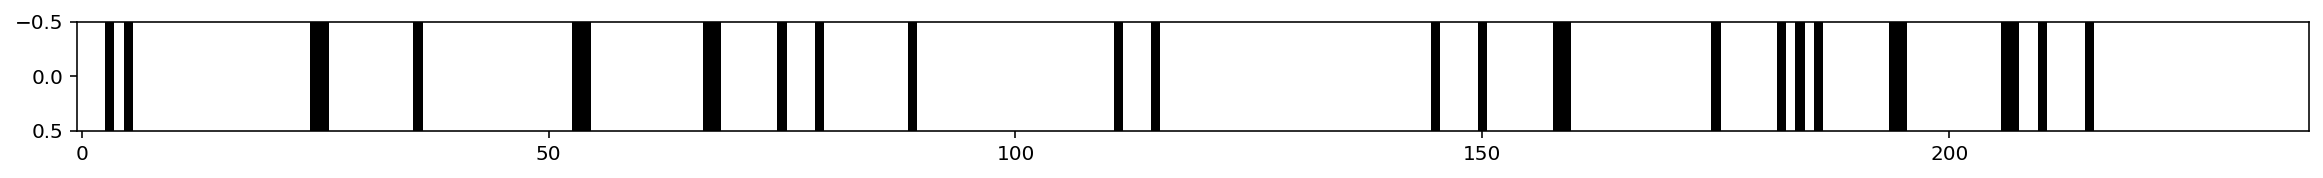

In [6]:
analyze_utterances(trial.utterances_per_subject)